<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="lightblue" size=6px>
                    <b> Project :  Customer Capability of Purchasing
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('data/data_new.csv')
df.head()

,Client_Id,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000
1,818770008,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000
2,713982108,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000
3,769911858,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000
4,709106358,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000


In [3]:
## not required custemer id column
df.drop(labels=['Client_Id','Avg_Utilization_Ratio'],axis=1,inplace=True)

In [4]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000


## Automation of FE

In [5]:
## segregation of numerical and categorical columns

categorical_cols=df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

In [6]:
print("categorical columns : ",categorical_cols)
print("Numerical columns : ",numerical_cols)

categorical columns :  Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical columns :  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')


In [7]:
cat = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
num = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

In [8]:
## Define custom ranking for each ordinal variable 

Attrition_Flag_categories=['Attrited Customer','Existing Customer']
Gender_categories=['F','M']
Education_Level_categories=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
Marital_Status_categories=['Divorced','Single','Married']
Income_Category_categories=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
Card_Category_categories=['Blue', 'Silver','Gold','Platinum']


## Pipeline creation 

In [9]:
## Numeric pipeline

num_pipeline=Pipeline(
steps=[
    ('scaler',StandardScaler())
])

## categorical pipeline

cat_pipeline = Pipeline(
steps=[
    ('ordinalencoder',OrdinalEncoder(categories=[Attrition_Flag_categories,Gender_categories,Education_Level_categories,Marital_Status_categories,Income_Category_categories,Card_Category_categories])),
    ('scaler',StandardScaler())
])

## preprocessor

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    
])

In [10]:
data=pd.DataFrame(preprocessor.fit_transform(df),columns=list(df.columns))

In [11]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587


In [24]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
10122,0.459384,-0.266547,0.636198,-0.522785,-0.304176,0.569467,-0.478276,0.844455,-0.612926,0.511703,2.224265,0.437506,1.059956,0.593388,-0.735306,-0.058127,-0.250587
10123,-0.664411,-0.266547,-1.773013,0.120579,-0.304176,0.569467,-0.423718,1.255524,-0.624894,0.511703,0.177232,-2.285681,1.059956,0.593388,-2.323710,-0.058127,-0.250587
10124,-0.289813,-1.036462,-0.006258,0.763943,0.882447,1.683731,-0.198316,-1.426858,0.026080,0.511703,-0.206586,-2.285681,-0.943436,-0.893680,0.853099,-0.736292,-0.250587
10125,-2.037938,-0.266547,-0.006258,0.120579,0.882447,0.569467,-0.223803,-1.426858,0.000967,2.976062,-0.121293,-2.285681,1.059956,0.593388,0.853099,-0.058127,-0.250587
10126,-0.414679,-0.266547,-1.773013,1.407306,-0.304176,1.683731,0.793095,0.979433,0.618196,0.511703,-0.163940,-2.285681,-0.943436,0.593388,0.853099,-0.736292,2.745506


In [16]:
data.shape

(10127, 17)

In [17]:
data.dtypes

Attrition_Flag              float64
Customer_Age                float64
Gender                      float64
Dependent_count             float64
Education_Level             float64
Marital_Status              float64
Income_Category             float64
Card_Category               float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_Count       float64
Contacts_Count              float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
dtype: object

In [23]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_Count       0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

In [12]:
 ## PCA Dimentionality Reduction  

In [13]:
# pca= PCA(n_components=3)
# pca.fit(data)
# pca_df=pd.DataFrame(pca.transform(data),columns=['col1','col2','col3'])
# pca_df.head()

In [14]:
## #d projection of data

# x=pca_df['col1']
# y=pca_df['col2']
# z=pca_df['col3']

# fig=plt.figure(figsize=(10,8))
# ax=fig.add_subplot(111, projection="3d")
# ax.scatter(x,y,z,c='orange',marker='o')
# ax.set_title('A 3d Projection of data in reduced dimentionality')
# plt.show()


In [25]:
wcss =[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:

def knee_locator(df):
    try:
        wcss = []
        for k in range(1,11):
            kmeans = KMeans(n_clusters = k, init= "k-means++")
            kmeans.fit(df)
            wcss.append(kmeans.inertia_)

        k1 = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
        knee = k1.knee
        silhouette_coefficient = []
        silhouette_dict = dict()
        for k in range(2,11):
            kmeans = KMeans(n_clusters=k, init="k-means++")
            kmeans.fit(df)
            score= silhouette_score(df,kmeans.labels_)
            silhouette_coefficient.append(score)
            silhouette_dict[k]=score

        return knee , silhouette_dict

    except Exception as e:
        logging.info("exception occure during knee location and silhouette score find")
        raise CustomException(e, sys)


In [ ]:
wcss

[172158.99999999962,
 151747.54388410546,
 140374.1493138084,
 132102.83441554575,
 124946.08548208016,
 119512.45462404896,
 115083.64019184546,
 111796.88759463385,
 109310.56705727521,
 106933.03049878261]

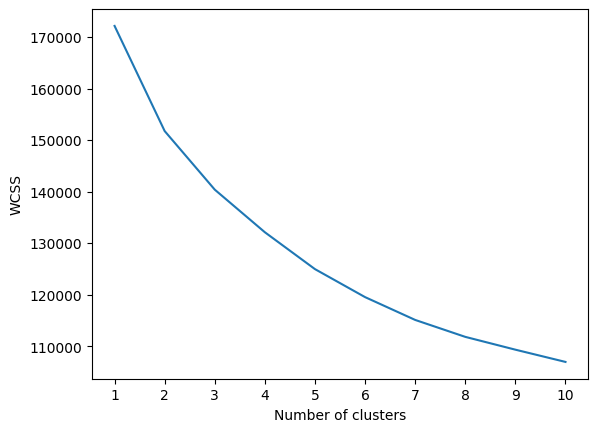

In [ ]:
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.knee

4

In [ ]:
## silhouette score

silhouette_coefficient = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    score=silhouette_score(data,kmeans.labels_)
    silhouette_coefficient.append(score)

In [ ]:
silhouette_coefficient

[0.12893686951166672,
 0.10419091870388683,
 0.10736279755270965,
 0.1172056768596636,
 0.10094748438696877,
 0.10760389590362844,
 0.09286093837404986,
 0.08622353225842101,
 0.09275772974666467]

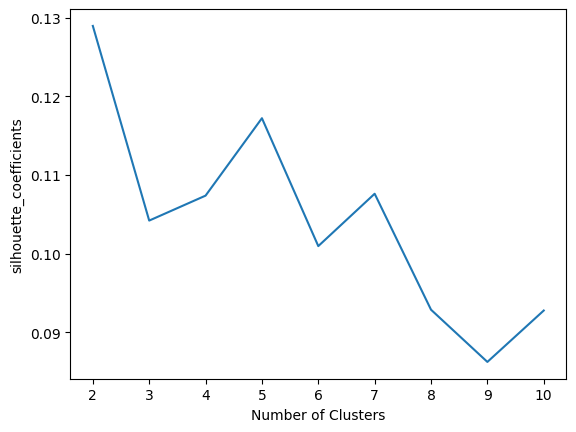

In [ ]:
## plotting silhoutte score

plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++')

In [ ]:
Clusters=kmeans.fit_predict(data)
data['Clusters']=Clusters

## also save clusters with origional data and

Clustered_data = pd.concat([df,pd.Series(Clusters)],axis = 1)


In [ ]:
Clustered_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,0
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,1
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,1
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,1
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,1
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,1


In [ ]:
## save clustered data 

Clustered_data.to_csv("data/Clustered_data.csv")

In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587,1
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587,1
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587,1
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587,1


In [ ]:
# for i in data.columns[:-1]:
#     sns.histogram(x=data['Clusters'],y=data[i])
#     plt.show()

In [ ]:
c_g=data.groupby('Clusters')

In [ ]:
c_g.first()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
Clusters,,,,,,,,,,,,,,,,,
0,-1.163875,0.503368,-0.006258,0.763943,-0.304176,-0.037453,3.175349,1.661686,2.856385,-1.374172,-1.741860,0.437506,1.059956,-1.637214,-0.735306,0.620039,-0.250587
1,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587
2,0.584250,1.273283,1.599883,1.407306,-1.490798,0.569467,0.443434,1.351236,0.430269,-1.386522,-1.443335,0.437506,1.059956,0.593388,0.853099,1.976370,5.741599
3,-1.163875,0.503368,-1.130557,0.120579,2.069070,-0.544797,0.126048,0.783101,-0.007665,-0.763472,-0.334526,0.437506,-0.943436,-1.637214,-0.735306,-0.736292,-0.250587
4,1.957777,-1.806378,2.081725,-1.166148,0.882447,0.569467,-0.988956,-1.426858,-0.752950,-1.780482,-2.083032,-2.285681,-0.943436,0.593388,0.853099,-0.736292,-0.250587


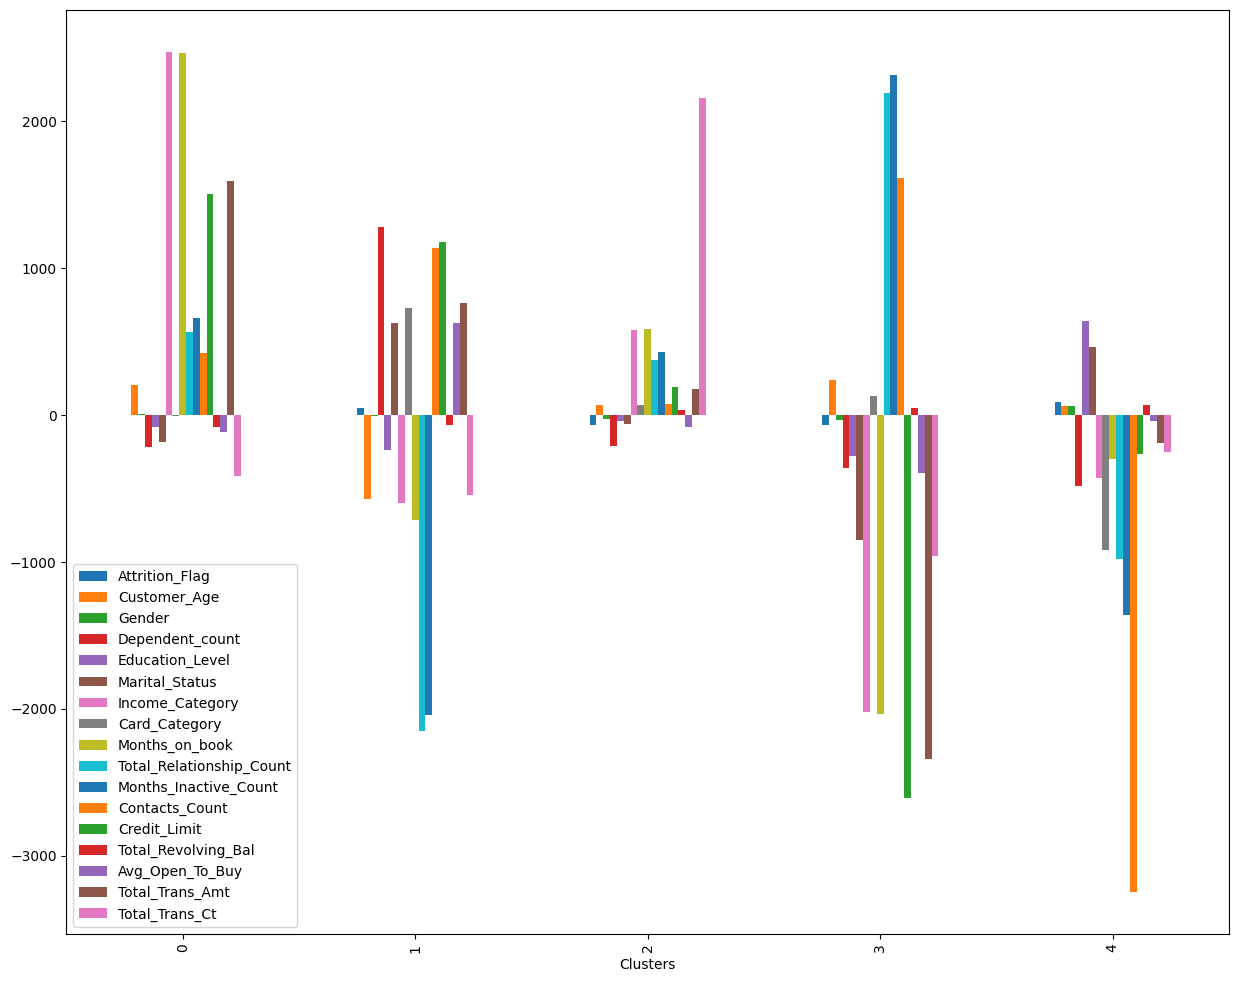

In [ ]:

c_g.sum().plot(kind="bar",figsize=(15,12))
plt.show()

In [ ]:
c_g.sum()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
Clusters,,,,,,,,,,,,,,,,,
0,-0.368635,204.349746,6.716880,-221.040393,-79.742578,-181.480739,2473.524964,-4.753702,2463.524584,562.787085,662.429206,422.772263,1505.573031,-82.826260,-117.990515,1596.734051,-413.718522
1,50.399037,-574.367438,-6.256873,1279.957348,-239.781040,629.864379,-600.794459,728.354766,-716.020973,-2152.161290,-2045.289898,1136.784431,1175.197635,-69.494409,629.859529,763.406180,-541.933669
2,-69.057195,67.284908,-30.457923,-211.256147,-41.582250,-62.818051,577.478669,66.866579,588.217136,375.609096,426.685068,73.871877,193.212625,34.504328,-80.408524,178.436202,2161.367943
3,-66.825413,241.371289,-30.918631,-360.963296,-276.089378,-852.139698,-2020.388221,130.119226,-2038.059069,2192.142556,2316.103736,1614.087135,-2608.238877,46.550211,-392.904314,-2344.701336,-957.240916
4,85.852206,61.361495,60.916546,-486.697512,637.195245,466.574109,-429.820953,-920.586869,-297.661678,-978.377446,-1359.928112,-3247.515705,-265.744412,71.266130,-38.556177,-193.875097,-248.474836


In [ ]:
c_g.sum().T

Clusters,0,1,2,3,4
Attrition_Flag,-0.368635,50.399037,-69.057195,-66.825413,85.852206
Customer_Age,204.349746,-574.367438,67.284908,241.371289,61.361495
Gender,6.716880,-6.256873,-30.457923,-30.918631,60.916546
Dependent_count,-221.040393,1279.957348,-211.256147,-360.963296,-486.697512
Education_Level,-79.742578,-239.781040,-41.582250,-276.089378,637.195245
Marital_Status,-181.480739,629.864379,-62.818051,-852.139698,466.574109
Income_Category,2473.524964,-600.794459,577.478669,-2020.388221,-429.820953
Card_Category,-4.753702,728.354766,66.866579,130.119226,-920.586869
Months_on_book,2463.524584,-716.020973,588.217136,-2038.059069,-297.661678
Total_Relationship_Count,562.787085,-2152.161290,375.609096,2192.142556,-978.377446


In [ ]:
final_df=c_g.mean()

In [ ]:
final_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
Clusters,,,,,,,,,,,,,,,,,
0,-0.000223,0.123773,0.004068,-0.133883,-0.048300,-0.109922,1.498198,-0.002879,1.492141,0.340876,0.401229,0.256070,0.911916,-0.050167,-0.071466,0.967131,-0.250587
1,0.019258,-0.219476,-0.002391,0.489093,-0.091624,0.240682,-0.229574,0.278317,-0.273604,-0.822377,-0.781540,0.434385,0.449063,-0.026555,0.240680,0.291710,-0.207082
2,-0.111924,0.109052,-0.049365,-0.342392,-0.067394,-0.101812,0.935946,0.108374,0.953350,0.608767,0.691548,0.119728,0.313149,0.055923,-0.130322,0.289200,3.503027
3,-0.017494,0.063186,-0.008094,-0.094493,-0.072275,-0.223073,-0.528897,0.034063,-0.533523,0.573859,0.606310,0.422536,-0.682785,0.012186,-0.102855,-0.613796,-0.250587
4,0.060374,0.043152,0.042839,-0.342263,0.448098,0.328111,-0.302265,-0.647389,-0.209326,-0.688029,-0.956349,-2.283766,-0.186881,0.050117,-0.027114,-0.136340,-0.174736


In [ ]:
final_df.T

Clusters,0,1,2,3,4
Attrition_Flag,-0.000223,0.019258,-0.111924,-0.017494,0.060374
Customer_Age,0.123773,-0.219476,0.109052,0.063186,0.043152
Gender,0.004068,-0.002391,-0.049365,-0.008094,0.042839
Dependent_count,-0.133883,0.489093,-0.342392,-0.094493,-0.342263
Education_Level,-0.048300,-0.091624,-0.067394,-0.072275,0.448098
Marital_Status,-0.109922,0.240682,-0.101812,-0.223073,0.328111
Income_Category,1.498198,-0.229574,0.935946,-0.528897,-0.302265
Card_Category,-0.002879,0.278317,0.108374,0.034063,-0.647389
Months_on_book,1.492141,-0.273604,0.953350,-0.533523,-0.209326
Total_Relationship_Count,0.340876,-0.822377,0.608767,0.573859,-0.688029


In [ ]:
features = ['Customer_Age','Education_Level','Income_Category','Card_Category','Credit_Limit','Months_Inactive_Count','Avg_Open_To_Buy','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']

<Axes: xlabel='Clusters'>

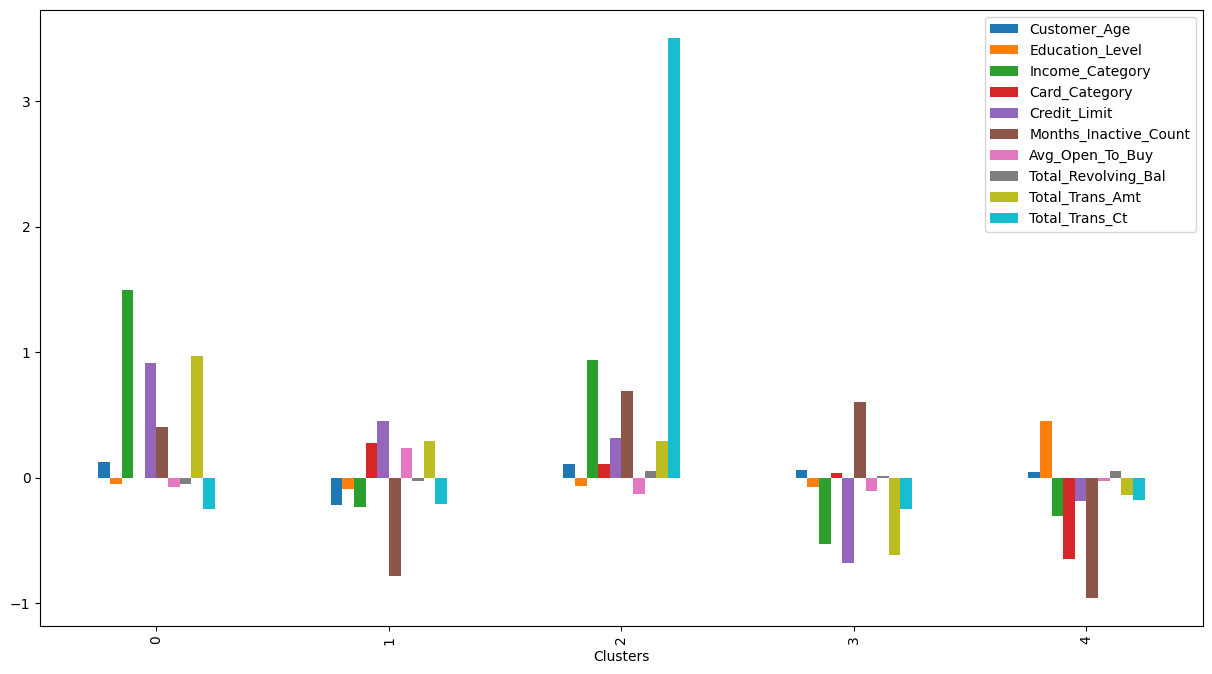

In [ ]:
final_df[features].plot(kind="bar",figsize=(15,8))

# Profiling the cluster

## Cluster : 0 

-  Customer Age            : High
-  Education               : Good
-  Income                  : High
-  Card Category           : Good
-  Credit Limit            : High 
-  Month Inactive          : Many
-  Average Open to Buy     : Fair 
-  Total Revolving Balance : Low 
-  Total Transaction Amount: High
_  Total transaction count : Lowest

## Cluster : 1

-  Customer Age            : Low
-  Education               : Low
-  Income                  : Good
-  Card Category           : High
-  Credit Limit            : Good 
-  Month Inactive          : Less
-  Average Open to Buy     : High
-  Total Revolving Balance : Average 
-  Total Transaction Amount: Good
_  Total transaction count : Low

## Cluster : 2

-  Customer Age            : High
-  Education               : Fair
-  Income                  : Good
-  Card Category           : Good
-  Credit Limit            : Good 
-  Month Inactive          : High
-  Average Open to Buy     : Low
-  Total Revolving Balance : High
-  Total Transaction Amount: Good
_  Total transaction count : High

## Cluster : 3

-  Customer Age            : Average
-  Education               : Low
-  Income                  : Low
-  Card Category           : Average
-  Credit Limit            : Low 
-  Month Inactive          : High
-  Average Open to Buy     : Low 
-  Total Revolving Balance : Average 
-  Total Transaction Amount: Low
-  Total transaction count : Low

## Cluster : 4

-  Customer Age            : Low
-  Education               : Good
-  Income                  : Low
-  Card Category           : Low
-  Credit Limit            : Low 
-  Month Inactive          : High
-  Average Open to Buy     : Average
-  Total Revolving Balance : High 
-  Total Transaction Amount: Average
-  Total transaction count : Low

# Conclusion : 

Excellent customer  : Cluster 0

Very Good customer : Cluster 1

Good customer : Cluster 2

Worst customer : Cluster 3

Fair customer  : Cluster 4